---Parte 2---
f(M) =  0.0
f(MC) =  1.1379318557813095e-28
f(-M) =  0.0
f(0) =  1213.3640630746083
---Parte 3---
|gradf(M)| =  0.0
|gradf(-M)| =  0.0
|gradf(MC)| =  1.8146083720652786e-13
|gradf(0)| =  0.0
---Parte 4---
Tiempo descenso por gradiente (s):  0.6078178882598877
|gradf(actual_x)| =  0.08367386267460673
---Parte 5---
Tiempo descenso con acelaración de Nesterov(s):  0.1609325408935547
|gradf(x_nesterov)| =  0.019029100104738867


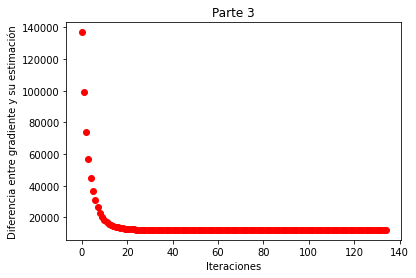

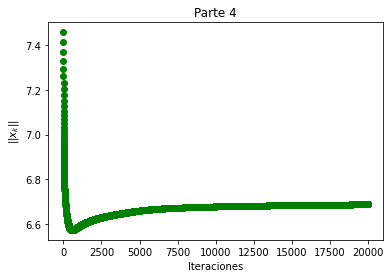

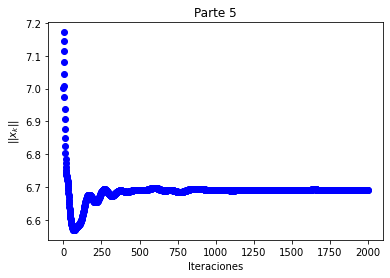

In [ ]:
#Segundo obligatorio FuO
#Santiago Algorta y Carlos Gruss
#FInG UdelaR 2021

import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import time

##Parte 2##
print("---Parte 2---")

#Dimensiones del problema.
n=15
d=10

#Generamos una matriz aleatoria Mrand nxd.
M = np.random.rand(n, d)
#Generamos una matriz aleatoria semidefinida positiva nxn.
A = np.dot(M,M.T)

#Definimos la funcion objetivo
def f(X):
  return la.norm(A-np.dot(X,X.T), 'fro')**2

#Es claro que X=M minimiza la función:
print("f(M) = ", f(M))

#Veamos que multiplicar M por una matriz ortogonal da otras soluciones:
#Definimos C matriz aleatoria dxd ortonormal.
C, r = la.qr(np.random.rand(d,d))
MC = np.dot(M,C)
print("f(MC) = ", f(MC))
#Tomemos el caso particular de C=-Id (que obviamente es ortogonal):
menosM = np.dot(M, (-1)*np.identity(d))
print("f(-M) = ", f(menosM))

#La solucion claramente no es unica. 
#Por tanto la funcion no es estrictamente convexa.
#Veamos que además no es convexa:
print("f(0) = ", f(np.zeros((n,d))))

##Parte 3##
print("---Parte 3---")

#Definimos la función gradiente
def gradf(X):
  return 4*np.dot((np.dot(X,X.T)-A),X)

#Vemos que en los puntos que identificamos como mínimos, el gradiente se anula:
print("|gradf(M)| = ",la.norm(gradf(M)))
print("|gradf(-M)| = ",la.norm(gradf(menosM)))
print("|gradf(MC)| = ",la.norm(gradf(MC)))
print("|gradf(0)| = ",la.norm(gradf(np.zeros((n,d)))))

#Definimos cociente incremental evaluado en un punto "x" y una dirección "v" dadas
def ci(x,v,h):
  return (f(x+v*h)-f(x))/h

#Valores aleatorios para punto y dirección de evaluación
x_grad = np.random.rand(n,d)
v_grad = np.random.rand(n,d)
 
#Veamos que la respuesta numérica tiende a la respuesta teórica
iteracionesGradiente = []
estimacionesGradiente = []
 
for i in range(135):
  iteracionesGradiente.append(i)
  estimacionesGradiente.append(la.norm(np.dot(gradf(x_grad).T,v_grad)-ci(x_grad,v_grad,(1/10)**(i/10)), 'fro'))



#Grafica calculo númerico del gradiente
plt.figure(0)
plt.plot(iteracionesGradiente, estimacionesGradiente, "ro")
plt.xlabel("Iteraciones")
plt.ylabel("Diferencia entre gradiente y su estimación")
plt.title("Parte 3")
plt.savefig("graf1.png")

##Parte 4##
print("---Parte 4---")

#Creamos un método de descenso por gradiente por maximo descenso
alpha = 0.0002

def descenso(actual_x):
  return actual_x-gradf(actual_x)*alpha

#Defino el punto de partida.
actual_x = np.random.rand(n,d)

#Veamos que converge
iteracionesDescenso = []
normaDescenso = []

startDescenso = time.time()
 
for i in range(20000):
  iteracionesDescenso.append(i)
  normaDescenso.append(la.norm(actual_x, 'fro'))
  actual_x = descenso(actual_x)

endDescenso = time.time()
print("Tiempo descenso por gradiente (s): ", endDescenso-startDescenso)

#Veamos que es un minimo
print('|gradf(actual_x)| = ', la.norm(gradf(actual_x)))

#Grafica convergencia a un mínimo
plt.figure(1)
plt.plot(iteracionesDescenso, normaDescenso, "go")
plt.xlabel("Iteraciones")
plt.ylabel("$||x_{k}||$")
plt.title("Parte 4")
plt.savefig("graf2.png")

##Parte 5##
print("---Parte 5---")

#Implementamos un descenso con aceleración
def nesterov(xk, yk, k):
  return (yk-alpha*gradf(yk)), ((yk-alpha*gradf(yk))+(k/(k+3))*((yk-alpha*gradf(yk))-xk))

iteracionesNesterov = []
normaNesterov = []

x_nesterov = np.random.rand(n,d)
y_nesterov = np.random.rand(n,d)

startNesterov = time.time()

for i in range(2000):
  iteracionesNesterov.append(i)
  normaNesterov.append(la.norm(x_nesterov, 'fro'))
  x_nesterov, y_nesterov = nesterov(x_nesterov, y_nesterov, i)

endNesterov = time.time()
print("Tiempo descenso con acelaración de Nesterov(s): ", endNesterov-startNesterov)

print('|gradf(x_nesterov)| = ', la.norm(gradf(x_nesterov)))

#Grafica convergencia a un mínimo
plt.figure(2)
plt.plot(iteracionesNesterov, normaNesterov, "bo")
plt.xlabel("Iteraciones")
plt.ylabel("$||x_{k}||$")
plt.title("Parte 5")
plt.savefig("graf3.png")

# 3D visualization

8.604008829269446
20.792472722136523
50.247149959921614


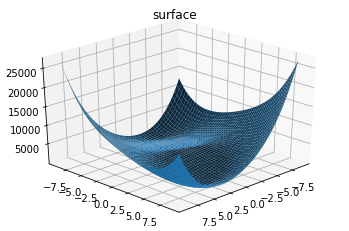

In [ ]:
from mpl_toolkits import mplot3d

n=2
d=1

M = np.random.rand(n, d)*10
A = np.dot(M,M.T)
a=A[0][0]
b=A[0][1]
d=A[1][1]

print(a)
print(b)
print(d)

def f_2dim(x1, x2):
    return (a+1-x1**2)**2+2*(b+1-x1*x2)**2+(d+1-x2**2)**2

x1 = np.linspace(-9, 9, 100)
x2 = np.linspace(-9, 9, 100)

X1, X2 = np.meshgrid(x1, x2)
Z = f_2dim(X1, X2)

plt.figure(2)
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z)
ax.view_init(30, 45)
ax.set_title('surface');